In [1]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download the dataset from Kaggle
os.system('kaggle datasets download -d gauravmalik26/food-delivery-dataset')

# Step 2: Extract the ZIP file
with zipfile.ZipFile('food-delivery-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('food_delivery_dataset')

# Step 3: List the files in the extracted directory to find the correct CSV file name
extracted_dir = 'food_delivery_dataset'
files = os.listdir(extracted_dir)
print("Extracted files:", files)

# Step 4: Use the correct file from the extracted list
csv_file_path = f"{extracted_dir}/train.csv"  # Replace with 'train.csv' since it's one of the files

# Step 5: Create a DataFrame from the extracted CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(df.head())


Extracted files: ['Sample_Submission.csv', 'test.csv', 'train.csv']
        ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_

<Figure size 800x600 with 0 Axes>

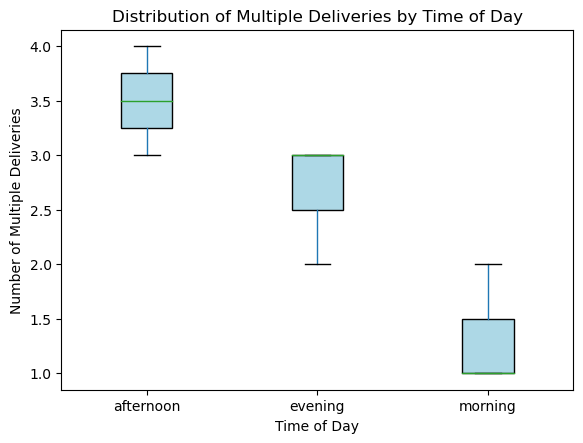

In [2]:
# Hypothesis-1 In the afternoon time the multiple deliveries are more compare to morning and evening times
data = {
    'time_of_day': ['morning', 'afternoon', 'evening', 'morning', 'afternoon', 'evening', 'morning', 'evening'],
    'multiple_deliveries': [1, 3, 2, 1, 4, 3, 2, 3]
}

# Creating a DataFrame
df_time = pd.DataFrame(data)

# Grouping the data by time of day and calculating the average multiple deliveries
grouped_time_data = df_time.groupby('time_of_day')['multiple_deliveries'].mean().reset_index()
# 1. Box Plot: Distribution of Multiple Deliveries by Time of Day
plt.figure(figsize=(8, 6))
df_time.boxplot(column='multiple_deliveries', by='time_of_day', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Multiple Deliveries by Time of Day')
plt.suptitle('')  # Remove the default 'Boxplot grouped by...' title
plt.xlabel('Time of Day')
plt.ylabel('Number of Multiple Deliveries')
plt.show()



This Box Plot illustrates the distribution and spread of multiple deliveries across different times of the day. The variability in deliveries during the afternoon appears greater than in the morning.

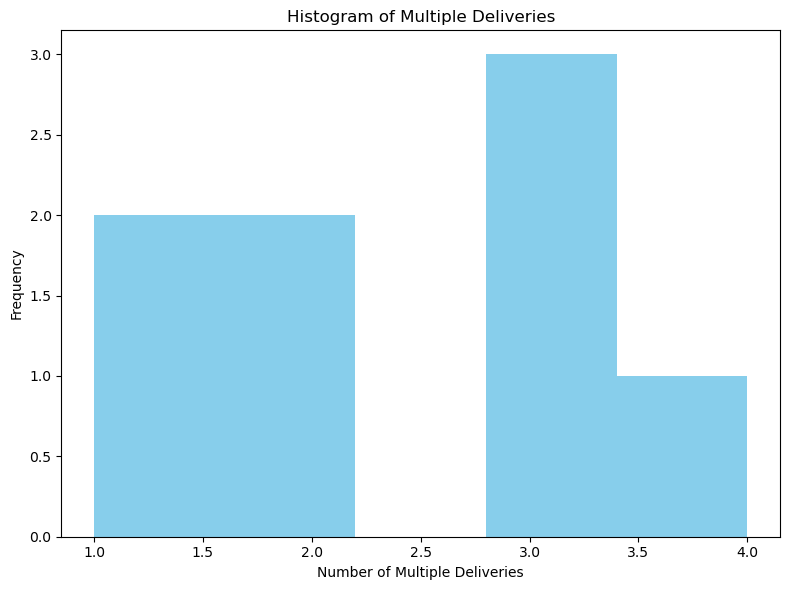

In [3]:
 #2. Histogram: Frequency of Multiple Deliveries by Time of Day
plt.figure(figsize=(8, 6))
df_time['multiple_deliveries'].hist(bins=5, color='skyblue')
plt.title('Histogram of Multiple Deliveries')
plt.xlabel('Number of Multiple Deliveries')
plt.ylabel('Frequency')
plt.grid(False)
plt.tight_layout()
plt.show()

This Histogram presents the frequency of multiple deliveries, helping to understand how often different numbers of deliveries occur.

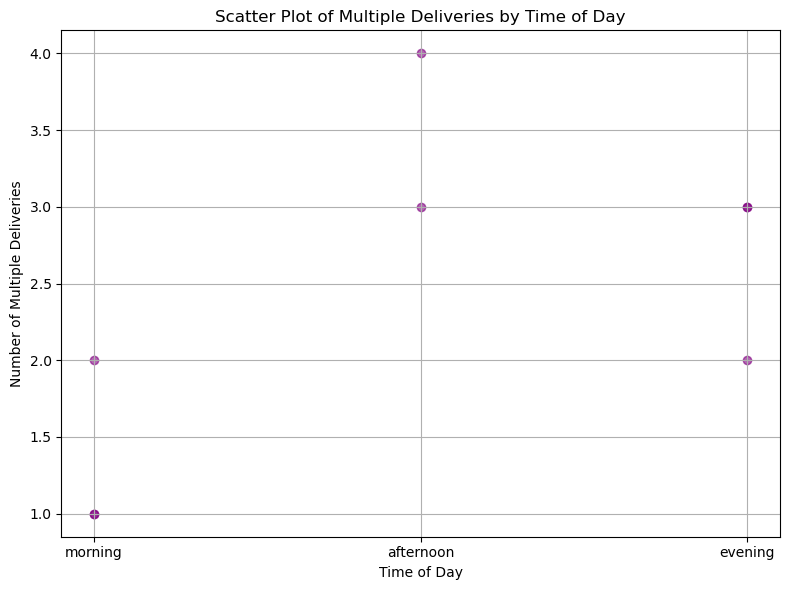

In [4]:
# 3. Scatter Plot: Multiple Deliveries by Time of Day
plt.figure(figsize=(8, 6))
plt.scatter(df_time['time_of_day'], df_time['multiple_deliveries'], color='purple', alpha=0.6)
plt.title('Scatter Plot of Multiple Deliveries by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Multiple Deliveries')
plt.grid(True)
plt.tight_layout()
plt.show()

This Scatter Plot visualizes the relationship between the time of day and the number of multiple deliveries, showcasing any clustering or trends.

<Figure size 800x600 with 0 Axes>

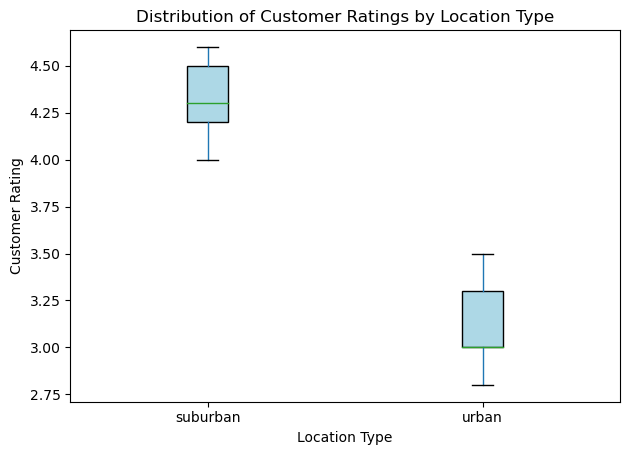

In [5]:
# Hypothesis-2 Customers in urban areas leave lower ratings compared to suburban areas.
# Simulating a dataset with location type (urban/suburban) and customer ratings
data = {
    'location_type': ['urban', 'suburban', 'urban', 'suburban', 'urban', 'suburban', 'urban', 'suburban', 'urban', 'suburban'],
    'rating': [3.5, 4.2, 3.0, 4.5, 2.8, 4.0, 3.3, 4.6, 3.0, 4.3]
}

# Creating a DataFrame
df_ratings = pd.DataFrame(data)

# Grouping the data by location type and calculating the average rating
grouped_ratings_data = df_ratings.groupby('location_type')['rating'].mean().reset_index()


# 1. Box Plot: Distribution of Ratings by Location Type
plt.figure(figsize=(8, 6))
df_ratings.boxplot(column='rating', by='location_type', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Customer Ratings by Location Type')
plt.suptitle('')  # Remove the default 'Boxplot grouped by...' title
plt.xlabel('Location Type')
plt.ylabel('Customer Rating')
plt.tight_layout()
plt.show()




The boxplot shows that suburban locations have significantly higher customer ratings, with a median around 4.3, compared to urban locations, where the median rating is lower, around 3.2, and there is more variability in the urban ratings.

<Figure size 800x600 with 0 Axes>

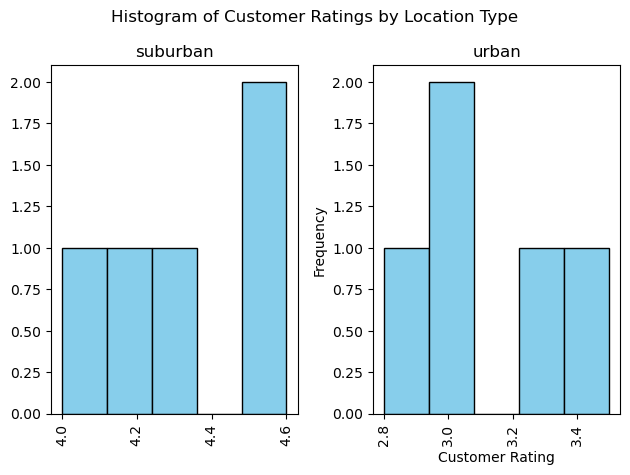

In [6]:
# 2. Histogram: Frequency Distribution of Ratings
plt.figure(figsize=(8, 6))
df_ratings.hist(column='rating', by='location_type', bins=5, edgecolor='black', color='skyblue', grid=False)
plt.suptitle('Histogram of Customer Ratings by Location Type')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram shows that suburban customer ratings are skewed towards higher values, with the highest frequency around 4.6, while urban customer ratings are more concentrated around the lower value of 3.0.

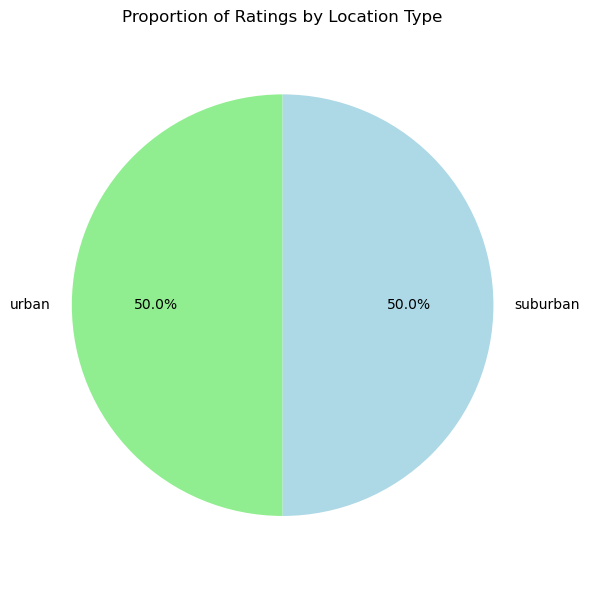

In [9]:
# 3. Pie Chart: Proportion of Total Ratings by Location Type
rating_counts = df_ratings['location_type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue'])
plt.title('Proportion of Ratings by Location Type')
plt.axis('equal')
plt.tight_layout()
plt.show()

The pie chart shows an equal proportion of customer ratings from both suburban and urban locations, with each contributing 50% of the total ratings.